![Doordash](https://raw.githubusercontent.com/interviewquery/takehomes/doordash_1/doordash_1/logo.png)
# Overview

In this exercise, you will use your machine learning experience to solve
a straightforward but challenging prediction​ ​problem.​ ​The​ ​exercise​
​involves building​ ​a​ ​machine​ ​learning​ model​ ​ ​for​ ​a​ ​prediction ​ task​

# Problem ​Description

When​ a​ ​consumer​ ​places​ ​an​ ​order​ ​on​ DoorDash,​​ we​ ​ show​ ​ the​ ​ ​expected ​
​time of​​ ​delivery.​ ​It​ ​is​ ​very ​important​ ​for​ DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the
estimated time taken for a delivery

Concretely, for a given delivery you must predict the ​**total delivery
duration seconds** , i.e., the time taken from

- Start:​ ​the​ ​time​ ​consumer​ ​submits​ ​the​ ​order ​ (​`created_at`) ​ to​
- End:​ ​when​ ​the​ ​order​ ​will​ ​be​ ​delivered​ to​ ​ ​the​ consumer​​
​(`actual_delivery_time`).

To​ ​help​ ​with​ ​this,​ ​we​ ​have​ ​provided

-   `historical_data.csv`:​ ​table​ ​of​ ​historical​ ​deliveries

-   `data_description.txt`:​ ​ description​ ​ of​ ​ all​ ​ columns​ ​ in​​ `historical_data.csv`

# Requirements

-   Build a model to predict the total delivery duration seconds (as
    defined above). Feel free to generate additional​ ​features​ ​from​ ​the ​ given​ ​ data​ ​ to​ ​ improve​ ​ model​ ​performance.​

### Deliverables

-   Submit one document that includes a write-up explaining your model,
    choices made and discussion on the​ ​questions ​ above.​
-   Submit​ ​the​ ​code​ ​used​ ​for​ ​this​ ​part

**Thank**​ ​**you**​ ​**for**​ ​**your**​ ​**hard**​ ​**work!**​ ​**Please**​ ​**let**​
​**us**​ ​**know**​ ​**if**​ ​**you**​ ​**have**​ ​**any**​ ​**questions.**​ ​**Good**​
​**luck!**


## DoorDash Delivery Duration Prediction Model

In [ ]:
# Accessing Datasets

!git clone --branch doordash_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/doordash_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (1963/1963), done.
remote: Compressing objects: 100% (1220/1220), done.
remote: Total 1963 (delta 752), reused 1927 (delta 726), pack-reused 0
Receiving objects: 100% (1963/1963), 297.43 MiB | 9.39 MiB/s, done.
Resolving deltas: 100% (752/752), done.
/content/takehomes/doordash_1/takehomes/doordash_1
data_description.txt  historical_data.csv  metadata.json
data_to_predict.json  logo.png		   takehomefile.ipynb


In [ ]:
# Viewing Data Description

!cat data_description.txt

#### Data description #### 
The attached file `historical_data.csv` contains a subset of deliveries received at DoorDash in early 2015 in a subset of the cities. Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below. Note all money (dollar) values given in the data are in cents and all time duration values given are in seconds 
The target value to predict here is the total seconds value between `created_at` and `actual_delivery_time`. 

We have added noise to the dataset to obfuscate certain business details. Both `historical_data.csv` and `data_to_predict.json` include similar noise. We will only be evaluating your model's performance on this noisy, artificial dataset. The baseline model we will compare it was also trained and evaluated on the same noisy dataset.

#### Columns in historical_data.csv

### Time features
market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
created_at

# Data Preprocessing and EDA

In [ ]:
# Importing Dataset
import pandas as pd
import numpy as np

historical_data = pd.read_csv('historical_data.csv')
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


Let's view some properties of our dataset.

In [ ]:
# Viewing Info about Dataset

historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

At first glance, it will be useful to convert some columns due to what they represent, based on the data description

In [ ]:
# Converting market_id to Categorical Variable

historical_data['market_id'] = historical_data['market_id'].astype(str)
historical_data['store_id'] = historical_data['store_id'].astype(str)

In [ ]:
# Covert time columns

historical_data['created_at'] = pd.to_datetime(historical_data['created_at'])
historical_data['actual_delivery_time'] = pd.to_datetime(historical_data['actual_delivery_time'])

Let's create our target variable using the relevant columns and create additional columns that might be more pertinent to our task

In [ ]:
# Create Target Variable

from datetime import datetime

historical_data['actual_total_delivery_duration'] = (historical_data['actual_delivery_time'] - historical_data['created_at']).dt.total_seconds()

In [ ]:
# Initial Feature Engineering

historical_data['busy_dashers_ratio'] = historical_data['total_busy_dashers'] / historical_data['total_onshift_dashers']
historical_data['estimated_non_preparation_duration'] = historical_data['estimated_order_place_duration'] + historical_data['estimated_store_to_consumer_driving_duration']

Next, we undergo further exploration and make changes where necessary.

In [ ]:
# Viewing Unique Values Per Column

historical_data.nunique()

market_id                                            7
created_at                                      180985
actual_delivery_time                            178110
store_id                                          6743
store_primary_category                              74
order_protocol                                       7
total_items                                         57
subtotal                                          8368
num_distinct_items                                  20
min_item_price                                    2312
max_item_price                                    2652
total_onshift_dashers                              172
total_busy_dashers                                 159
total_outstanding_orders                           281
estimated_order_place_duration                      98
estimated_store_to_consumer_driving_duration      1336
actual_total_delivery_duration                    7134
busy_dashers_ratio                                4025
estimated_

In [ ]:
# Viewing Null Values Per Column

historical_data.isnull().sum()

market_id                                           0
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
actual_total_delivery_duration                      7
busy_dashers_ratio                              19838
estimated_non_preparation_du

In [ ]:
# Dropping Rows With No Value In Target Variable

historical_data = historical_data.dropna(subset=['actual_total_delivery_duration'])

To address the issue of null values in store_primary_category, we will create a function to identify the most common categories per store_id, and use this to replace the null values.

In [ ]:
# Fill Missing store_primary_category by Assuming Most Frequent Category For Each store_id

# Create Dictionary Showing Most Repeated Category for Each Store ID

store_id_unique=historical_data['store_id'].unique().tolist()
store_id_and_category={store_id: historical_data[historical_data['store_id']==store_id].store_primary_category.mode()
                       for store_id in store_id_unique
                       }

In [ ]:
# Fill Function to fill null store_primary_categorey

def fill(store_id):
  try: return store_id_and_category[store_id].values[0]
  except: return np.nan

historical_data['store_primary_category'] = historical_data['store_id'].apply(fill)

In [ ]:
# Viewing Descriptive Summary Statistics for Dataset

historical_data.describe()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,estimated_non_preparation_duration
count,196426.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,181159.000000,181159.000000,181159.000000,197421.000000,196895.000000,1.974210e+05,1.775830e+05,196895.000000
mean,2.882358,3.196367,2682.326379,2.670780,686.224596,1159.590444,44.806866,41.738787,58.047969,308.560244,545.357089,2.908257e+03,NaN,853.937403
std,1.503775,2.666552,1823.106256,1.630261,522.044061,558.416236,34.525913,32.145163,52.660056,90.139725,219.353976,1.922961e+04,NaN,235.111964
min,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,1.010000e+02,-inf,153.000000
25%,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2.104000e+03,8.269231e-01,683.000000
50%,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2.660000e+03,9.622642e-01,850.000000
75%,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3.381000e+03,1.000000e+00,1017.000000
max,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8.516859e+06,inf,3222.000000


Since we have some infinite values, we will replace them with null entries to avoid potential issues when modeling.

In [ ]:
# Replacing inf values with nan

historical_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Updated Descriptive Summary Statistics

historical_data.describe()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,estimated_non_preparation_duration
count,196426.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,181159.000000,181159.000000,181159.000000,197421.000000,196895.000000,1.974210e+05,177544.000000,196895.000000
mean,2.882358,3.196367,2682.326379,2.670780,686.224596,1159.590444,44.806866,41.738787,58.047969,308.560244,545.357089,2.908257e+03,0.949781,853.937403
std,1.503775,2.666552,1823.106256,1.630261,522.044061,558.416236,34.525913,32.145163,52.660056,90.139725,219.353976,1.922961e+04,0.406191,235.111964
min,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,1.010000e+02,-13.000000,153.000000
25%,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2.104000e+03,0.826859,683.000000
50%,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2.660000e+03,0.962264,850.000000
75%,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3.381000e+03,1.000000,1017.000000
max,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8.516859e+06,31.000000,3222.000000


Next will be to explore the distribution of our columns to see if we identify any trends to influence our subsequent steps. We will also plot correlations between our numeric variables which may help influence further feature engineering where necessary.

array([[<Axes: title={'center': 'created_at'}>,
        <Axes: title={'center': 'actual_delivery_time'}>,
        <Axes: title={'center': 'order_protocol'}>,
        <Axes: title={'center': 'total_items'}>],
       [<Axes: title={'center': 'subtotal'}>,
        <Axes: title={'center': 'num_distinct_items'}>,
        <Axes: title={'center': 'min_item_price'}>,
        <Axes: title={'center': 'max_item_price'}>],
       [<Axes: title={'center': 'total_onshift_dashers'}>,
        <Axes: title={'center': 'total_busy_dashers'}>,
        <Axes: title={'center': 'total_outstanding_orders'}>,
        <Axes: title={'center': 'estimated_order_place_duration'}>],
       [<Axes: title={'center': 'estimated_store_to_consumer_driving_duration'}>,
        <Axes: title={'center': 'actual_total_delivery_duration'}>,
        <Axes: title={'center': 'busy_dashers_ratio'}>,
        <Axes: title={'center': 'estimated_non_preparation_duration'}>]],
      dtype=object)

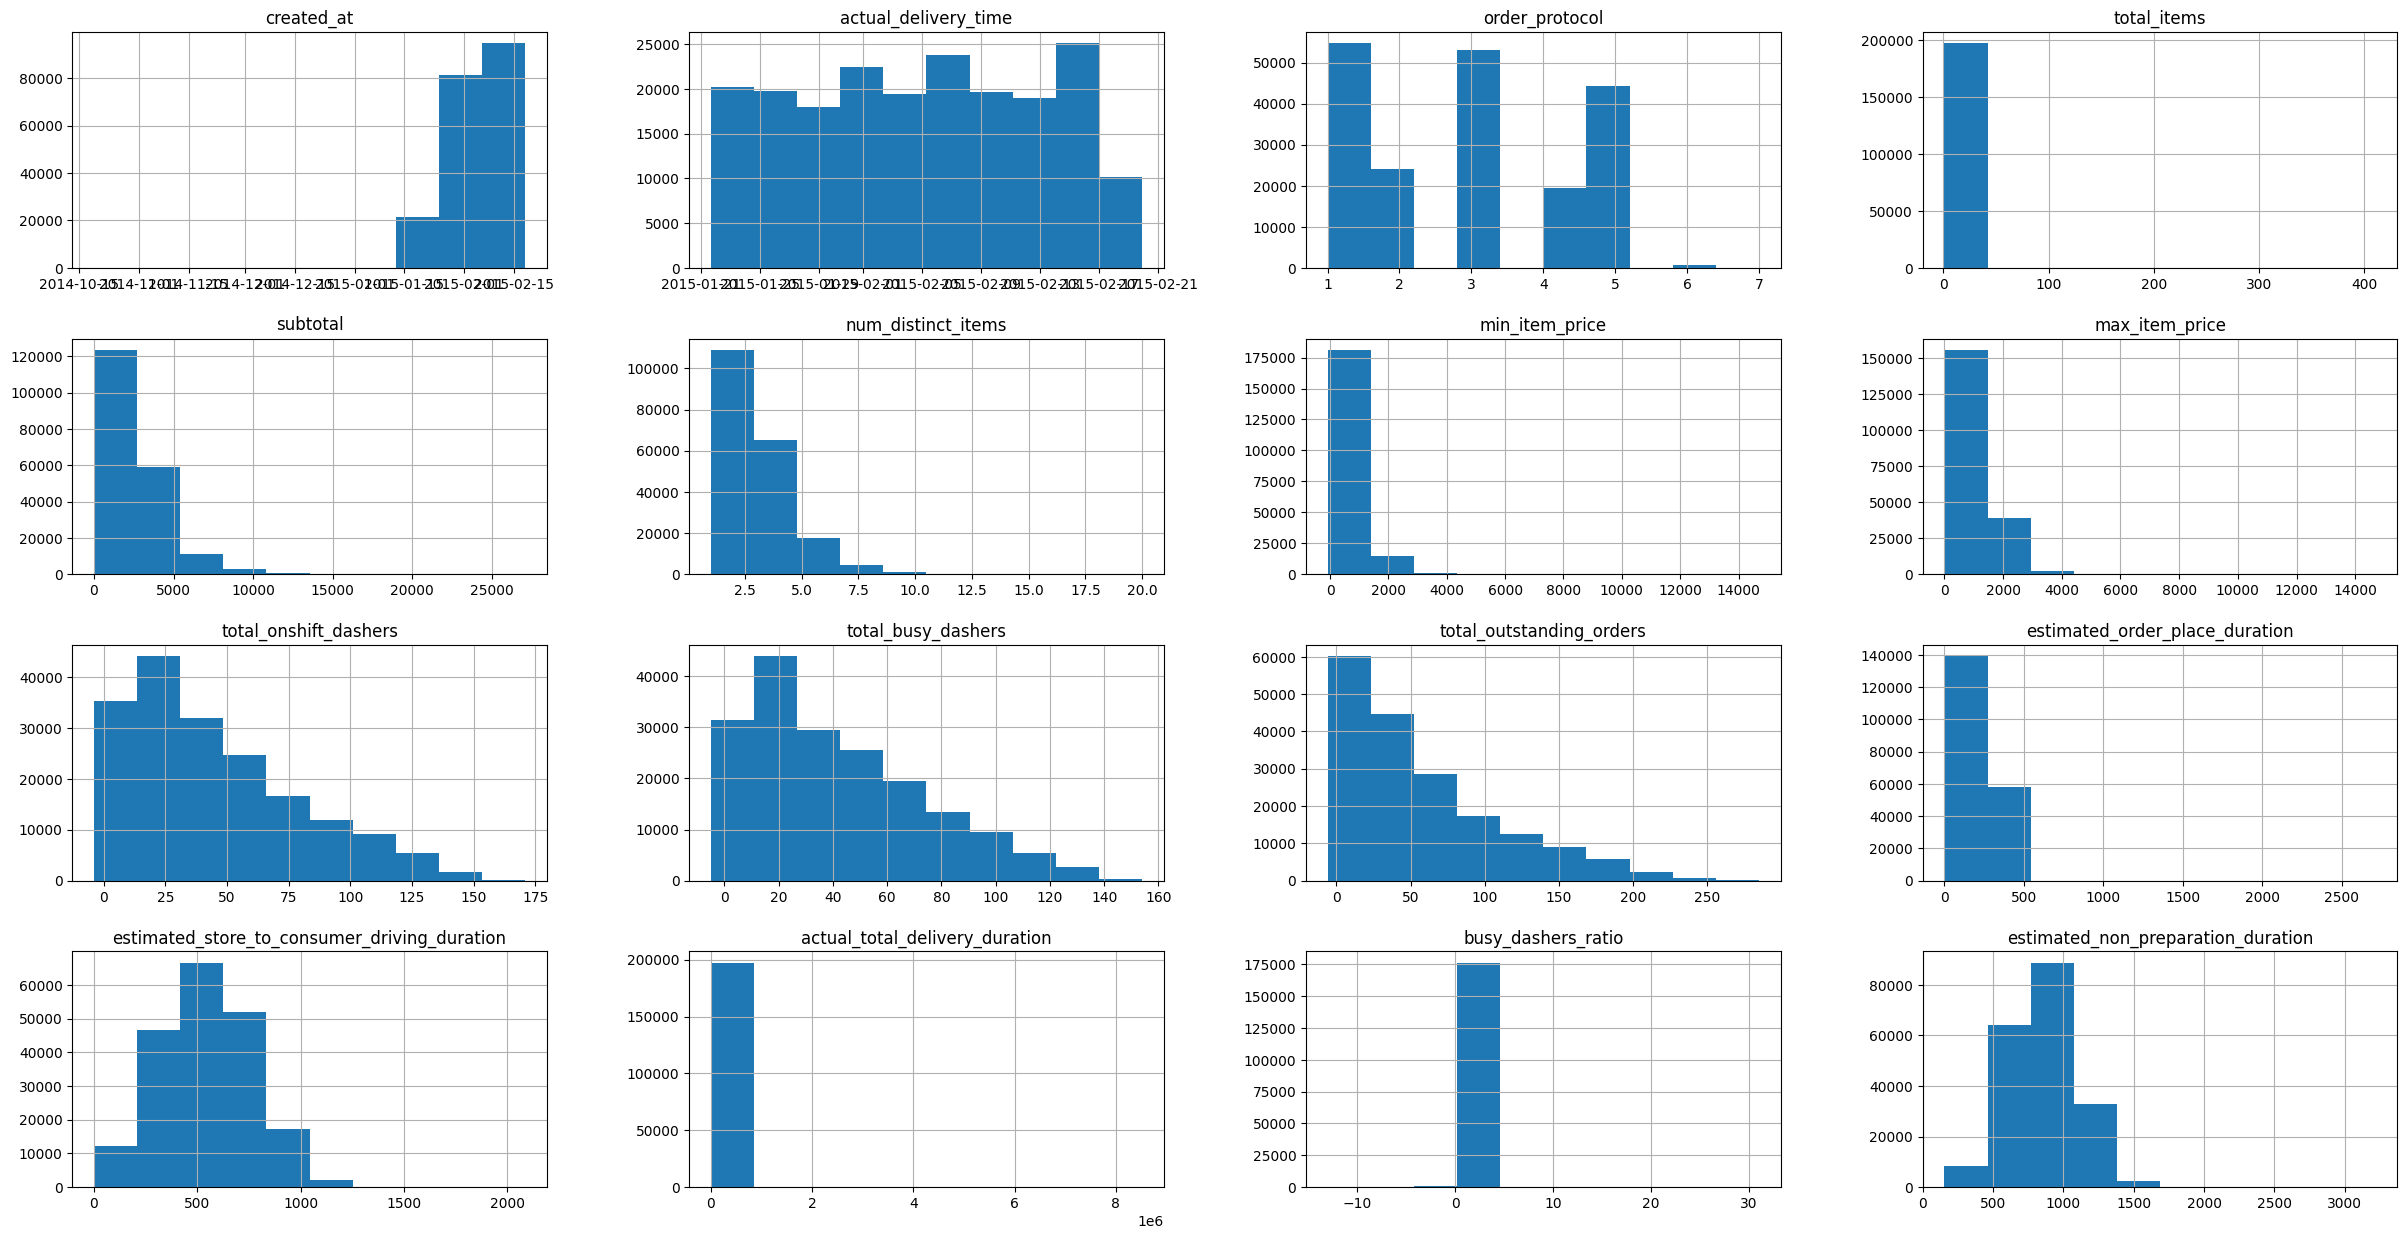

In [ ]:
# Viewing Distribution of Columns

historical_data.hist(figsize=(30, 15))

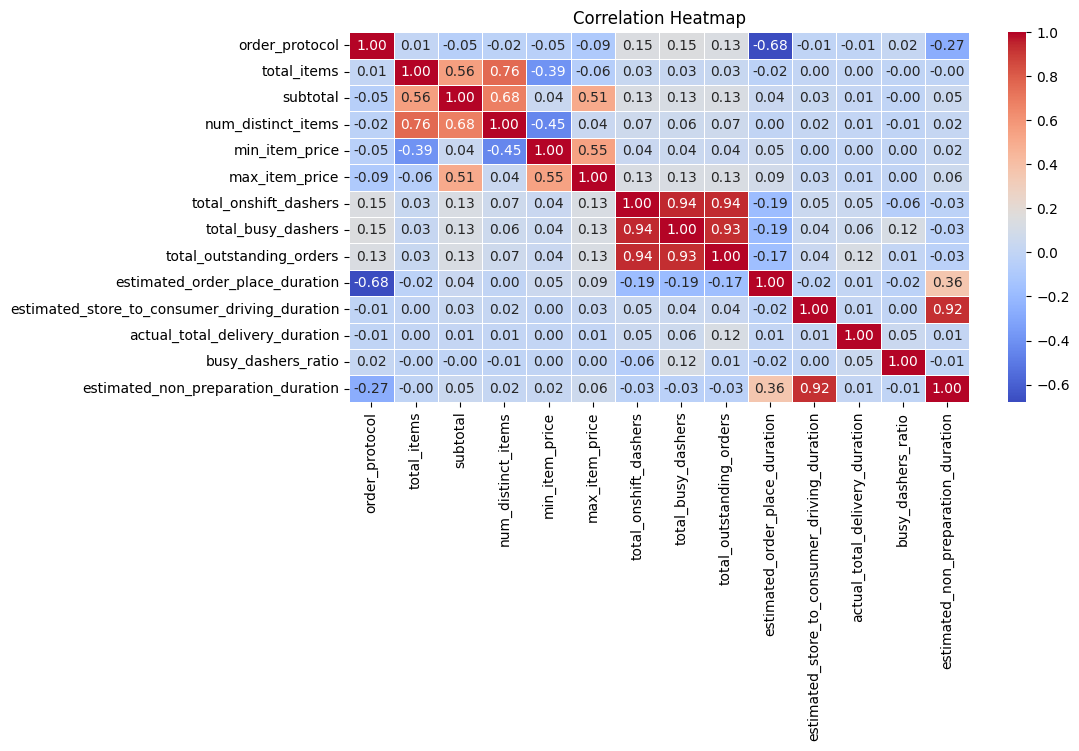

In [ ]:
# Correlation Heatmap to Identify Relationship Between Numeric Variables

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = historical_data.corr(numeric_only=True)

plt.figure().set_figwidth(10,8)
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

Our correlation maps shows some multicollinearity which may be problematic. Hence, we will drop redundant features as well as highly correlated features that may not be required. For example, estimated_store_to_consumer_driving_duration will be dropped as it was used in the creation of estimated_non_preparation_duration

In [ ]:
# Dropping Redundant and Collinear Columns

historical_data = historical_data.drop(columns = ['actual_delivery_time', 'created_at', 'order_protocol', 'store_id', 'total_onshift_dashers', 'total_busy_dashers',
                                                  'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration'])

In [ ]:
# Additional Feature Engineering to Tackle Further Collinearity

historical_data['avg_price_per_item'] = historical_data['subtotal'] / historical_data['total_items']
historical_data['percent_distinct_items_of_total'] = historical_data['num_distinct_items'] / historical_data['total_items']
historical_data['price_range_of_items'] = historical_data['max_item_price'] - historical_data['min_item_price']
historical_data = historical_data.drop(columns = ['subtotal', 'total_items', 'num_distinct_items', 'max_item_price', 'min_item_price'])

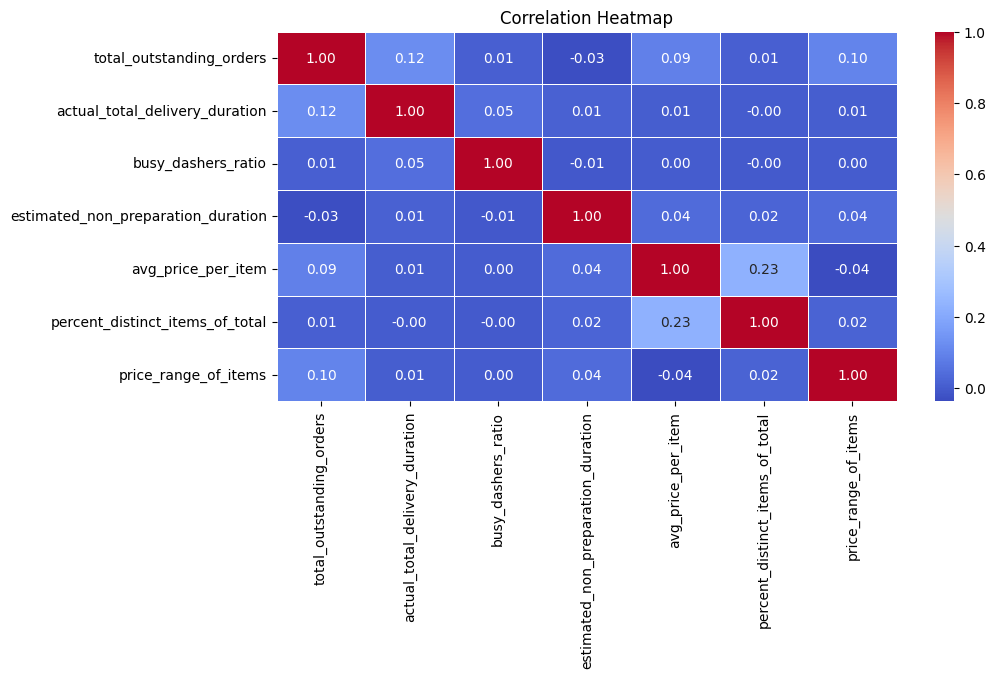

In [ ]:
# Updated Correlation Matrix

corr_matrix = historical_data.corr(numeric_only=True)

plt.figure().set_figwidth(10,8)
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Model Development and Evaluation

Here, We will build two models - Linear and Lasso Regression - and compare them using Root Mean Squared Error (RMSE) as our evaluation metric

In [ ]:
# Split Data Into Train and Test
from sklearn.model_selection import train_test_split

X = historical_data.drop('actual_total_delivery_duration', axis=1)
Y = historical_data['actual_total_delivery_duration']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

In [ ]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197421 entries, 0 to 197427
Data columns (total 9 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   market_id                           197421 non-null  object 
 1   store_primary_category              196554 non-null  object 
 2   total_outstanding_orders            181159 non-null  float64
 3   actual_total_delivery_duration      197421 non-null  float64
 4   busy_dashers_ratio                  177544 non-null  float64
 5   estimated_non_preparation_duration  196895 non-null  float64
 6   avg_price_per_item                  197421 non-null  float64
 7   percent_distinct_items_of_total     197421 non-null  float64
 8   price_range_of_items                197421 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 15.1+ MB


In [ ]:
# Create Pipelines for Preprocessing
# Preprocess Train and Test Set

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

onehot_cols = ['market_id', 'store_primary_category']
num_cols = [col for col in X_train.columns if col not in onehot_cols]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median'))])

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('enc', OneHotEncoder(), onehot_cols)
])

X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

In [ ]:
# Using Linear Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

base = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('model', LinearRegression())
])

base_lin_reg = base.fit(X_train, Y_train)

In [ ]:
# Assessing Linear Regression Model

from sklearn import metrics

base_pred = base_lin_reg.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, base_pred)))

RMSE: 1122.5512514915251


In [ ]:
# Using Lasso Regression

from sklearn.linear_model import Lasso

lasso_pip = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('model', Lasso(alpha=0.1, max_iter=10000))
])

lasso_reg = lasso_pip.fit(X_train, Y_train)

In [ ]:
# Assessing Lasso Regression Model

lasso_pred = lasso_reg.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, lasso_pred)))

RMSE: 1122.5157097981037


The Lasso Regression model performs slightly better than the Linear regression model. Additional measures such as further feature engineering, feature selection procedures, hyperparameter tuning and using additional modelling techniques might be required to improve our prediction performance.